### EDA del Proyecto Individual Henry

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos warnings para evitar los mensajes de error
import warnings

warnings.filterwarnings("ignore")

# Librerías adicionales
from ast import literal_eval  # Convierte string a list
import random  # Recortar dataset
import missingno as msno

# Establecer opciones de visualización para mostrar todas las columnas y filas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
plt.rcParams['font.size'] = 12

In [139]:
df = pd.read_csv("movies.csv")
df.head(2)

,id,budget,overview,popularity,revenue,runtime,title,vote_average,vote_count,collections,company,country,language,director,genre,actor,year,return
0,862,30000000.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,Toy Story,7.7,5415.0,Toy Story Collection,Pixar Animation Studios,United States of America,English,John Lasseter,"['Animation', 'Comedy', 'Family']","['Tom Hanks', 'Tim Allen', 'Don Rickles']",1995,12.45
1,8844,65000000.0,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Jumanji,6.9,2413.0,None,TriStar Pictures,United States of America,English,Joe Johnston,"['Adventure', 'Fantasy', 'Family']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",1995,4.04


1. Forma del dataset

In [140]:
forma = df.shape
print(f"El dataset contiene{forma[0]} filas y {forma[1]} columnas")

El dataset contiene5300 filas y 18 columnas


2. Información general de la data

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5300 non-null   int64  
 1   budget        5300 non-null   float64
 2   overview      5300 non-null   object 
 3   popularity    5300 non-null   float64
 4   revenue       5300 non-null   float64
 5   runtime       5300 non-null   float64
 6   title         5300 non-null   object 
 7   vote_average  5300 non-null   float64
 8   vote_count    5300 non-null   float64
 9   collections   5300 non-null   object 
 10  company       5300 non-null   object 
 11  country       5300 non-null   object 
 12  language      5293 non-null   object 
 13  director      5300 non-null   object 
 14  genre         5300 non-null   object 
 15  actor         5300 non-null   object 
 16  year          5300 non-null   int64  
 17  return        5300 non-null   float64
dtypes: float64(7), int64(2), obj

3. Revisamos los nulos

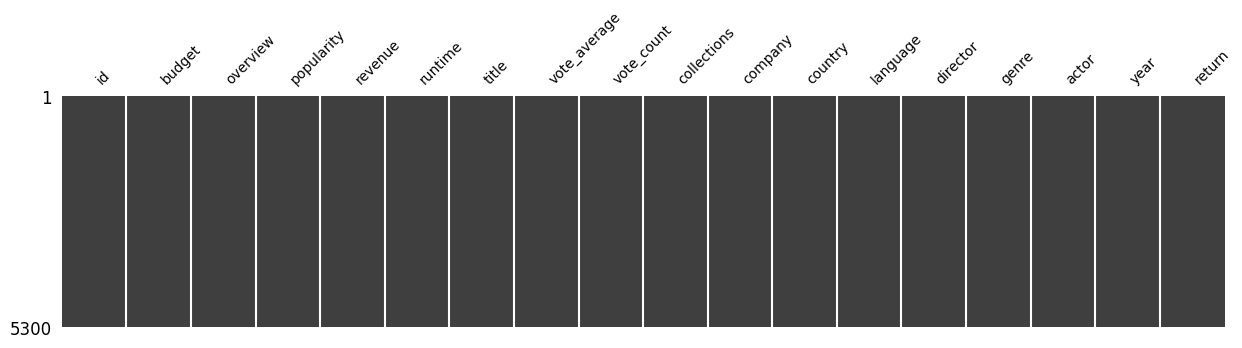

In [142]:
fig, ax = plt.subplots(figsize=(15, 3))
msno.matrix(df, ax=ax, fontsize=10)
plt.show()

4. Dividimos en variables numéricas y categóricas

In [143]:
df_cat = df[[col for col in df.columns if df[col].dtype == "object"]]
df_num = df[[col for col in df.columns if df[col].dtype != "object"]]

5. Estudiamos los datos numéricos

In [144]:
df_num.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,year,return
count,5300.000000,5.300000e+03,5300.000000,5.300000e+03,5300.000000,5300.000000,5300.000000,5300.000000,5.300000e+03
mean,62471.538491,1.493576e+07,6.099936,4.645905e+07,98.932830,5.981094,370.994717,1982.911132,1.938839e+02
std,85025.230636,3.411532e+07,11.071034,1.358253e+08,31.048994,1.417474,981.645233,26.042314,1.399179e+04
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1896.000000,0.000000e+00
25%,11466.500000,0.000000e+00,1.128639,0.000000e+00,88.000000,5.500000,9.000000,1962.000000,0.000000e+00
50%,29472.000000,0.000000e+00,4.484426,0.000000e+00,99.000000,6.200000,41.000000,1991.000000,0.000000e+00
75%,72191.750000,1.400000e+07,8.892004,2.541266e+07,112.000000,6.800000,227.000000,2005.000000,1.122500e+00
max,461297.000000,3.800000e+08,547.488298,2.068224e+09,705.000000,10.000000,12269.000000,2018.000000,1.018619e+06


Text(0.5, 1.0, 'return')

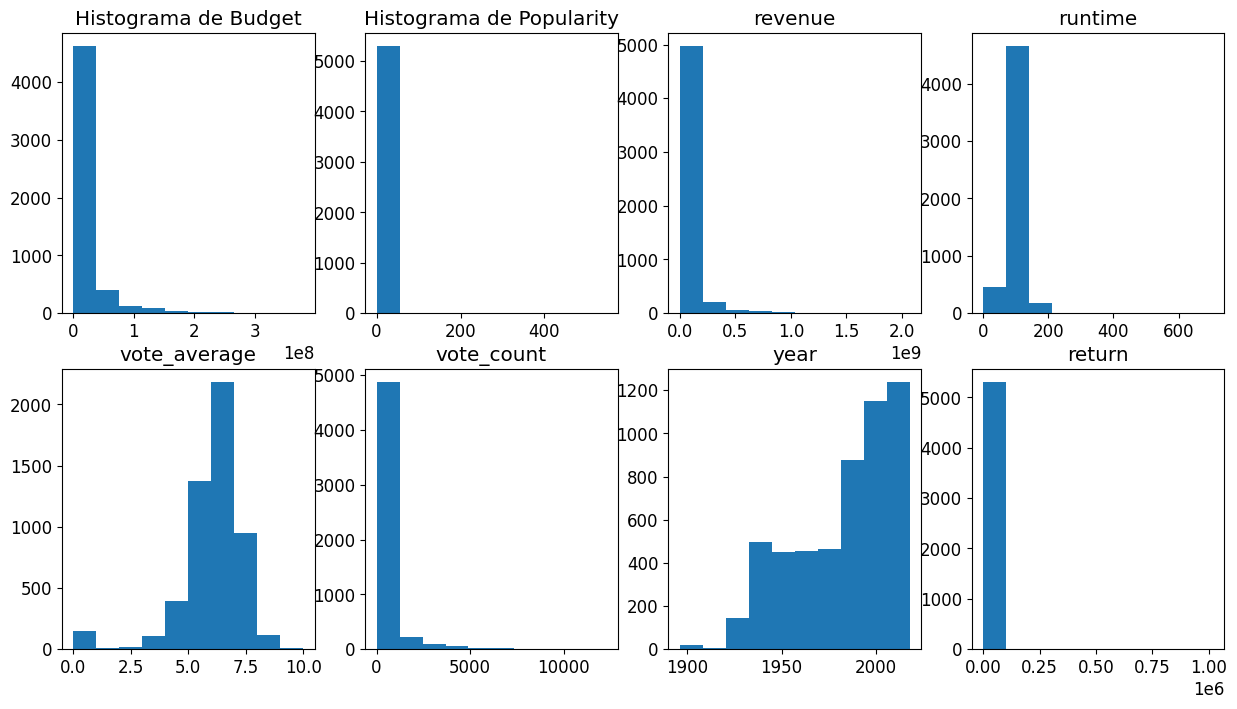

In [145]:
#Realizamos histogramas
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes[0, 0].hist(df["budget"])
axes[0, 0].set_title("Histograma de Budget")
axes[0, 1].hist(df["popularity"])
axes[0, 1].set_title("Histograma de Popularity")
axes[0, 2].hist(df["revenue"])
axes[0, 2].set_title("revenue")
axes[0, 3].hist(df["runtime"])
axes[0, 3].set_title("runtime")
axes[1, 0].hist(df["vote_average"])
axes[1, 0].set_title("vote_average")
axes[1, 1].hist(df["vote_count"])
axes[1, 1].set_title("vote_count")
axes[1, 2].hist(df["year"])
axes[1, 2].set_title("year")
axes[1, 3].hist(df["return"])
axes[1, 3].set_title("return")

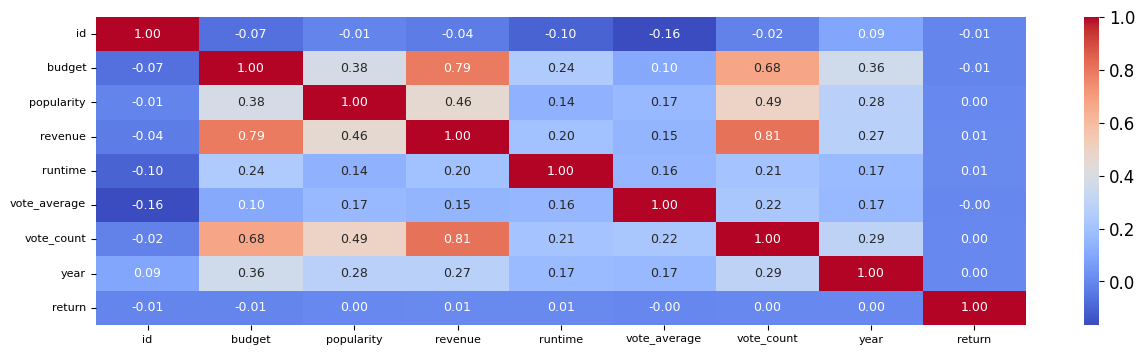

In [146]:
#Realizamos un mapa de correlación
plt.figure(figsize=(15, 4))
corr = df_num.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 9})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

<small> Se han detectado correlaciones altas en las siguientes columnas:

* buget y revenue
* budget y vote_count
* revenue y vote_count
* popularity y budget
* popularity y revenue
* popularity y vote_count

Text(0.5, 1.0, 'Popularity vs Vote_Count')

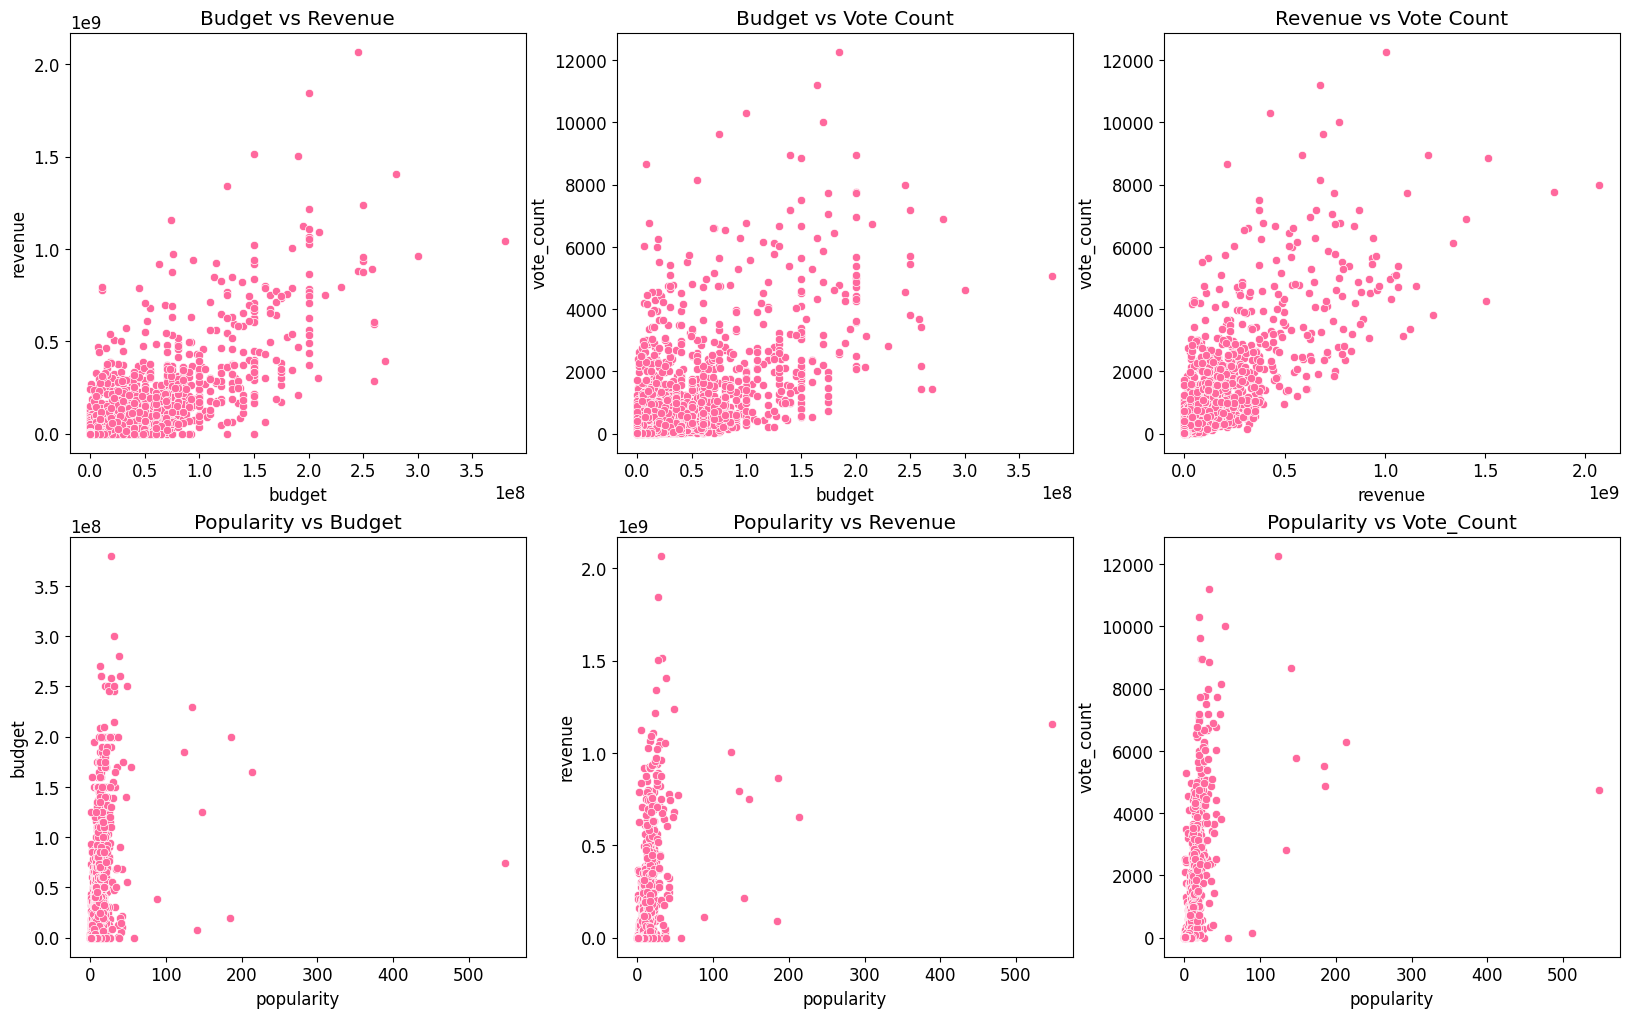

In [147]:
#Realizamos scatterplot
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

sns.scatterplot(data=df, x="budget", y="revenue", ax=axes[0, 0], color="#ff689d")
axes[0, 0].set_title("Budget vs Revenue")

sns.scatterplot(data=df, x="budget", y="vote_count", ax=axes[0, 1], color="#ff689d")
axes[0, 1].set_title("Budget vs Vote Count")

sns.scatterplot(data=df, x="revenue", y="vote_count", ax=axes[0, 2], color="#ff689d")
axes[0, 2].set_title("Revenue vs Vote Count")

sns.scatterplot(data=df, x="popularity", y="budget", ax=axes[1, 0], color="#ff689d")
axes[1, 0].set_title("Popularity vs Budget")

sns.scatterplot(data=df, x="popularity", y="revenue", ax=axes[1, 1], color="#ff689d")
axes[1, 1].set_title("Popularity vs Revenue")

sns.scatterplot(data=df, x="popularity", y="vote_count", ax=axes[1, 2], color="#ff689d")
axes[1, 2].set_title("Popularity vs Vote_Count")

In [148]:
#Revisamos outliers
columnas = ['id','popularity','return']
outlier_cols = [col for col in df_num if col not in columnas]
print(outlier_cols)
print('La cantidad de columnas son:',len(outlier_cols))

['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'year']
La cantidad de columnas son: 6


Text(0.5, 1.0, 'Year')

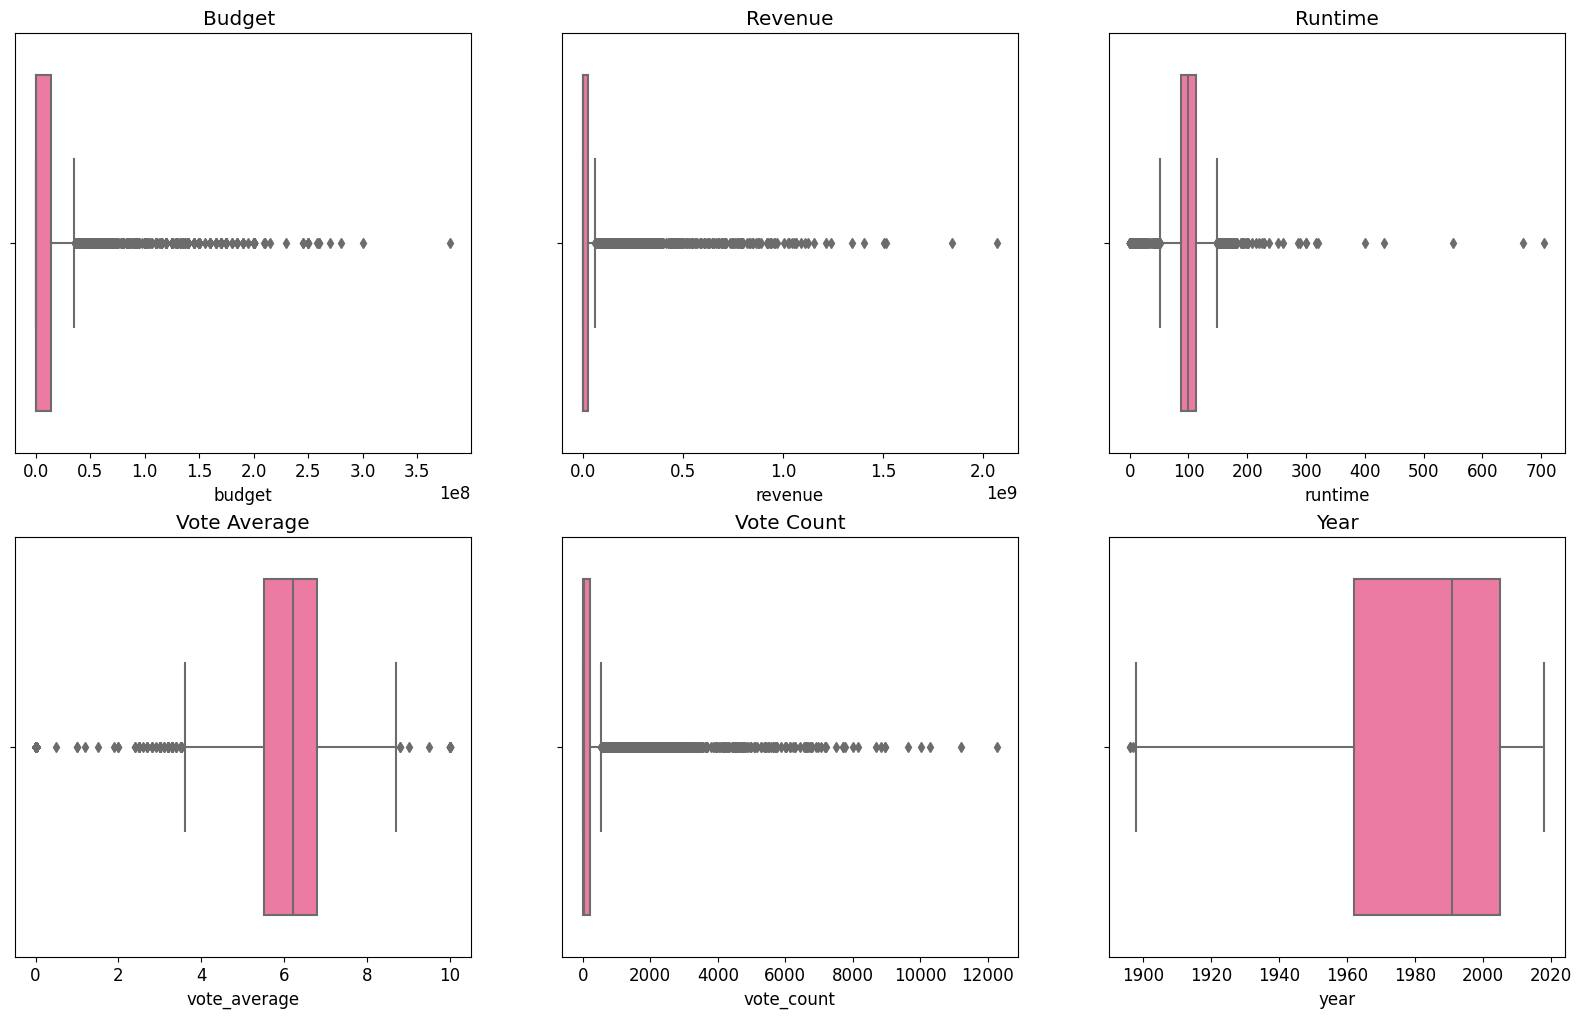

In [149]:
#Realizamos boxplots
fig, axes = plt.subplots(2, 3,figsize=(20, 12))

sns.boxplot(data=df, x="budget", ax=axes[0, 0], color="#ff689d")
axes[0, 0].set_title("Budget ")

sns.boxplot(data=df, x="revenue",ax=axes[0, 1], color="#ff689d")
axes[0, 1].set_title("Revenue")

sns.boxplot(data=df, x="runtime",ax=axes[0, 2], color="#ff689d")
axes[0, 2].set_title("Runtime")

sns.boxplot(data=df, x="vote_average",ax=axes[1, 0], color="#ff689d")
axes[1, 0].set_title("Vote Average")

sns.boxplot(data=df, x="vote_count",ax=axes[1, 1], color="#ff689d")
axes[1, 1].set_title("Vote Count")

sns.boxplot(data=df, x="year",ax=axes[1, 2], color="#ff689d")
axes[1, 2].set_title("Year")

6. Estudiamos las variables categóricas

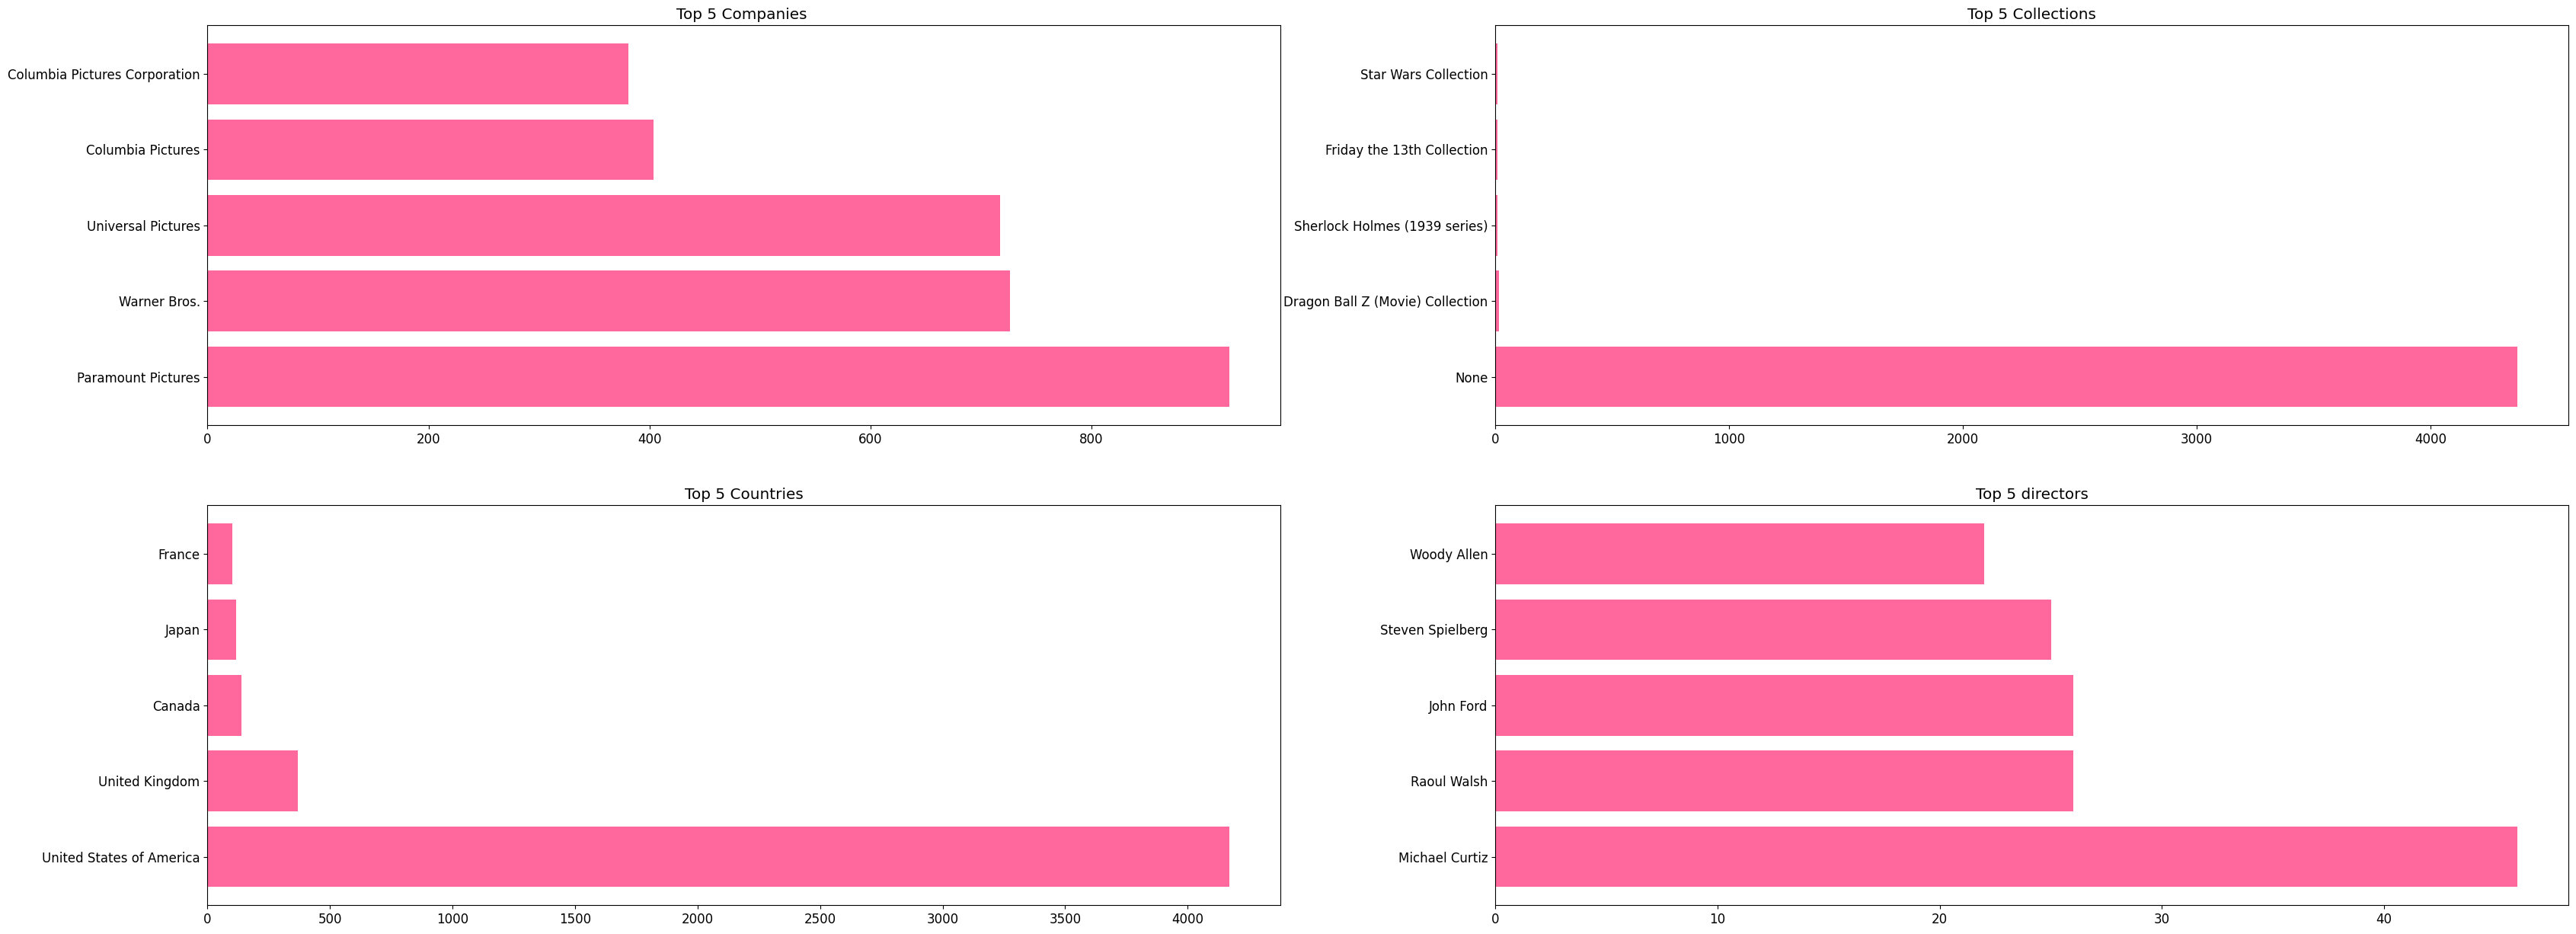

In [157]:
#Realizamos boxplots
fig, axes = plt.subplots(2, 2,figsize=(40, 15))

axes[0, 0].barh(df.company.value_counts().index[:5], df.company.value_counts()[:5],color='#ff689d')
axes[0, 0].set_title("Top 5 Companies ")

axes[0, 1].barh(df.collections.value_counts().index[:5], df.collections.value_counts()[:5], color='#ff689d')
axes[0, 1].set_title("Top 5 Collections")

axes[1, 0].barh(df.country.value_counts().index[:5], df.country.value_counts()[:5],color='#ff689d')
axes[1, 0].set_title("Top 5 Countries")

axes[1, 1].barh(df.director.value_counts().index[:5], df.director.value_counts()[:5],color='#ff689d')
axes[1, 1].set_title("Top 5 directors")

plt.show()